In [34]:
import h5py    
import numpy as np 
import matplotlib.pyplot as plt
from pyjet import cluster,DTYPE_PTEPM,sorted_by_pt

In [98]:
background_file = h5py.File("events_qcd_AD.h5", 'r')
signal_file = h5py.File("events_Wprime_AD.h5", 'r')

In [101]:
events={}
events['background'] = background_file["table"]
events['signal'] = signal_file["table"]

In [102]:
np.shape(events['background'])

(67402, 600, 3)

In [105]:
#Now, let's cluster some jets!
leadpT = {}
alljets = {}
for mytype in ['background','signal']:
    leadpT[mytype]=[]
    alljets[mytype]=[]
    for i in range(1000): #len(data)):
        if (i%100==0):
            print(mytype,i)
            pass
        pseudojets_input = np.zeros(len([x for x in events[mytype][i][:] if x[0] > 0]), dtype=DTYPE_PTEPM)
        for j in range(600):
            if (events[mytype][i][j][0]>0):
                pseudojets_input[j]['pT'] = events[mytype][i][j][0]
                pseudojets_input[j]['eta'] = events[mytype][i][j][1]
                pseudojets_input[j]['phi'] = events[mytype][i][j][2]
                pass
            pass
        sequence = cluster(pseudojets_input, R=1.0, p=-1)
        jets = sequence.inclusive_jets(ptmin=20)
        leadpT[mytype] += [jets[0].pt]
        alljets[mytype] += [jets]
        pass

background 0
background 100
background 200
background 300
background 400
background 500
background 600
background 700
background 800
background 900
signal 0
signal 100
signal 200
signal 300
signal 400
signal 500
signal 600
signal 700
signal 800
signal 900


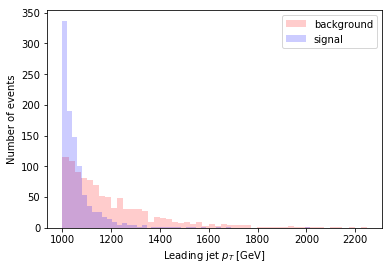

In [131]:
#Let's make some very simple plots.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(leadpT['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(leadpT['signal'], bins=50, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'Leading jet $p_{T}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()

In [127]:
mjj={}
for mytype in ['background','signal']:
    mjj[mytype]=[]
    for k in range(len(alljets[mytype])):
        E = alljets[mytype][k][0].e+alljets[mytype][k][1].e
        px = alljets[mytype][k][0].px+alljets[mytype][k][1].px
        py = alljets[mytype][k][0].py+alljets[mytype][k][1].py
        pz = alljets[mytype][k][0].pz+alljets[mytype][k][1].pz
        mjj[mytype]+=[(E**2-px**2-py**2-pz**2)**0.5]
        pass
    pass

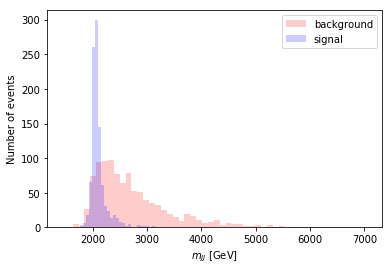

In [130]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.hist(mjj['background'], bins=50, facecolor='r', alpha=0.2,label='background')
plt.hist(mjj['signal'], bins=50, facecolor='b', alpha=0.2,label='signal')
plt.xlabel(r'$m_{JJ}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.show()